In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
auto_reg = pd.read_csv("Series/monthly-us-auto-registration-tho.csv")

In [28]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")

In [7]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [8]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Monthly US auto registration

In [52]:
auto_reg0 = auto_reg.ix[:,0].str.split(';')
data=[]
index=[]

for arr in auto_reg0.values:
    index.append(arr[0])
    data.append(int(arr[1]))
auto_reg_ready = pd.Series(data = data, index = index)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


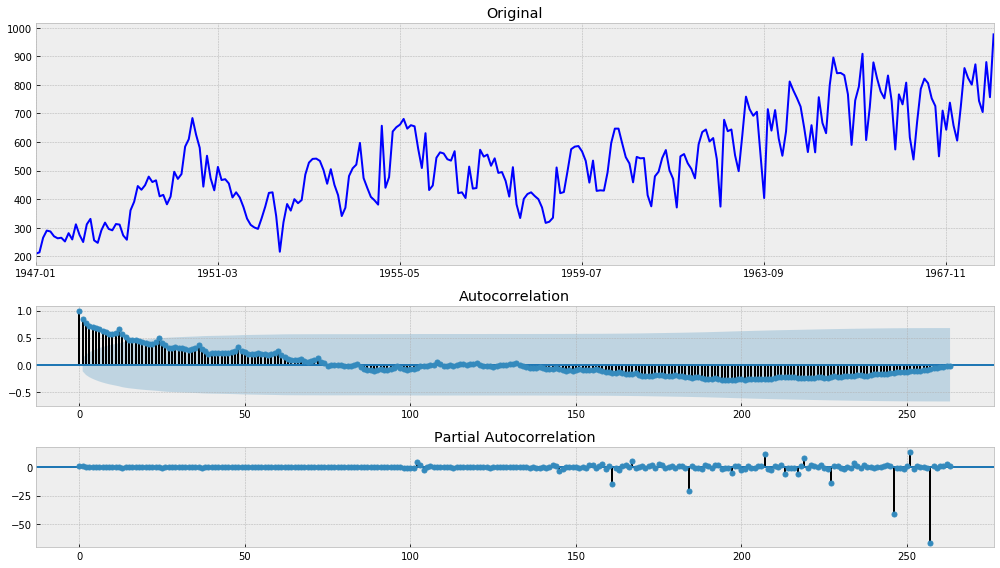

In [37]:
tsplot(auto_reg_ready)

Значение p_value выоское, уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [40]:
auto_reg_ready_bx = boxcox(auto_reg_ready, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


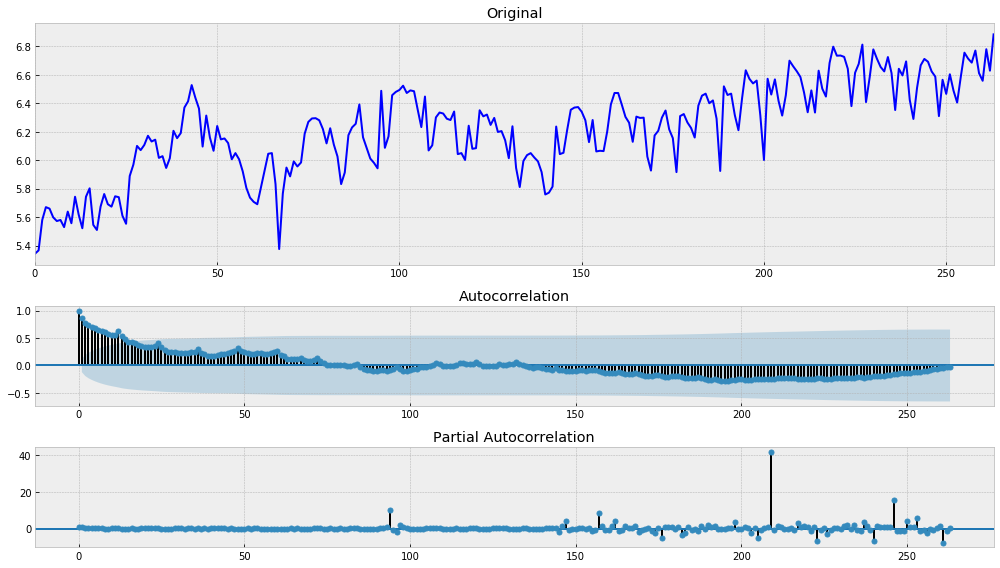

In [41]:
tsplot(auto_reg_ready_bx)

Значение p_value снизилось, однако на графике автокорреляции осталось синусоидность, проведем диферинциацию

In [73]:
auto_reg_ready_df = np.diff(auto_reg_ready_bx, 1)

Results of Dickey-Fuller Test:
Test Statistic                  -4.362471
p-value                          0.000346
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


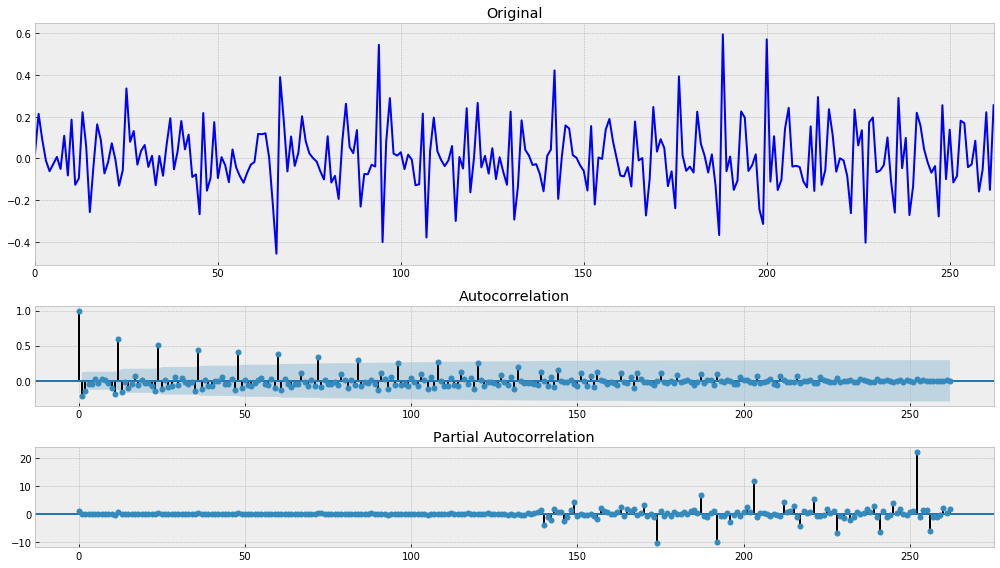

In [74]:
tsplot(auto_reg_ready_df)

Значение p_value и грфики удовлетворяют условия стационарного временного ряда!

# Weekly closings of the Dowjones

In [46]:
dowjones_closing0 = dowjones_closing.ix[:,0]
dowjones_closing1 = dowjones_closing.ix[:,1]
data=[]
index=[]

for w0 in dowjones_closing0.values:
    index.append(w0)
for w0 in dowjones_closing1.values:
    data.append(float(w0))
dowjones_closing_ready = pd.Series(data = data, index = index)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


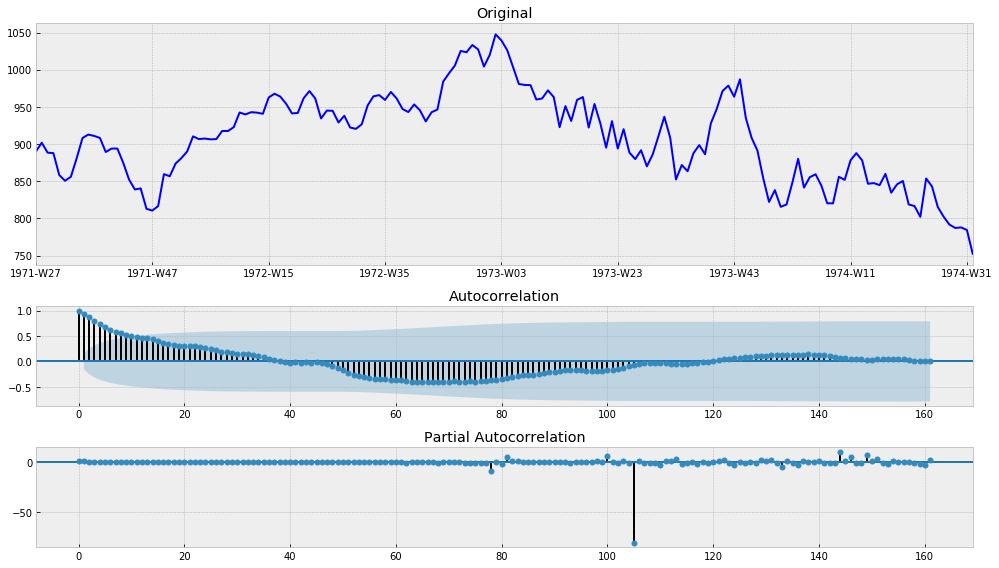

In [47]:
tsplot(dowjones_closing_ready)

Значение p_value выоское, уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [60]:
dowjones_closing_ready_bx = boxcox(dowjones_closing_ready, 4)

Results of Dickey-Fuller Test:
Test Statistic                  -1.577537
p-value                          0.494867
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


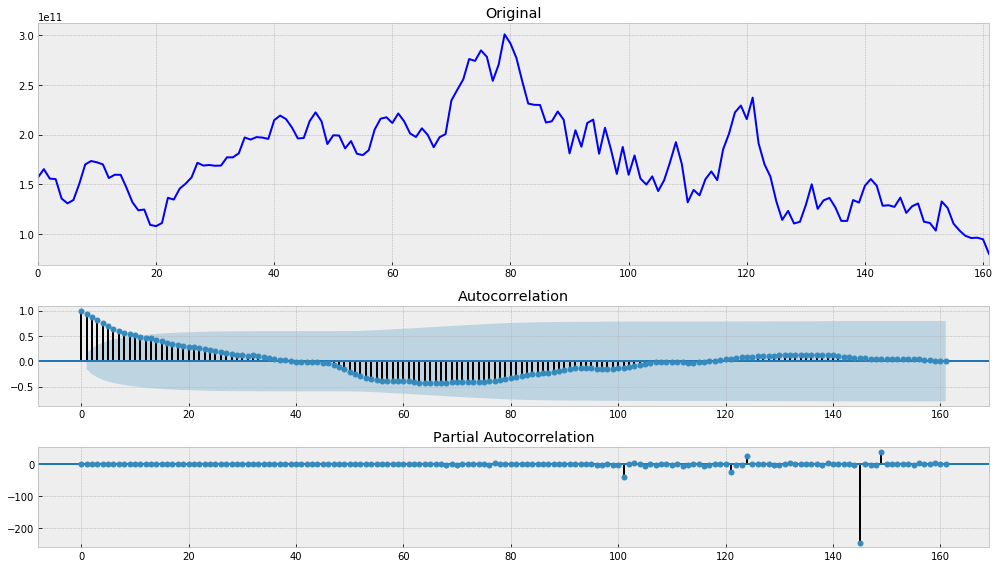

In [61]:
tsplot(dowjones_closing_ready_bx)

Значение p_value снизилось, однако на графике автокорреляции осталось синусоидность, проведем диферинциацию

In [70]:
dowjones_closing_ready_df = np.diff(dowjones_closing_ready_bx, 1)

Results of Dickey-Fuller Test:
Test Statistic                -5.669984e+00
p-value                        8.968347e-07
#Lags Used                     5.000000e+00
Number of Observations Used    1.550000e+02
Critical Value (1%)           -3.473259e+00
Critical Value (5%)           -2.880374e+00
Critical Value (10%)          -2.576812e+00
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


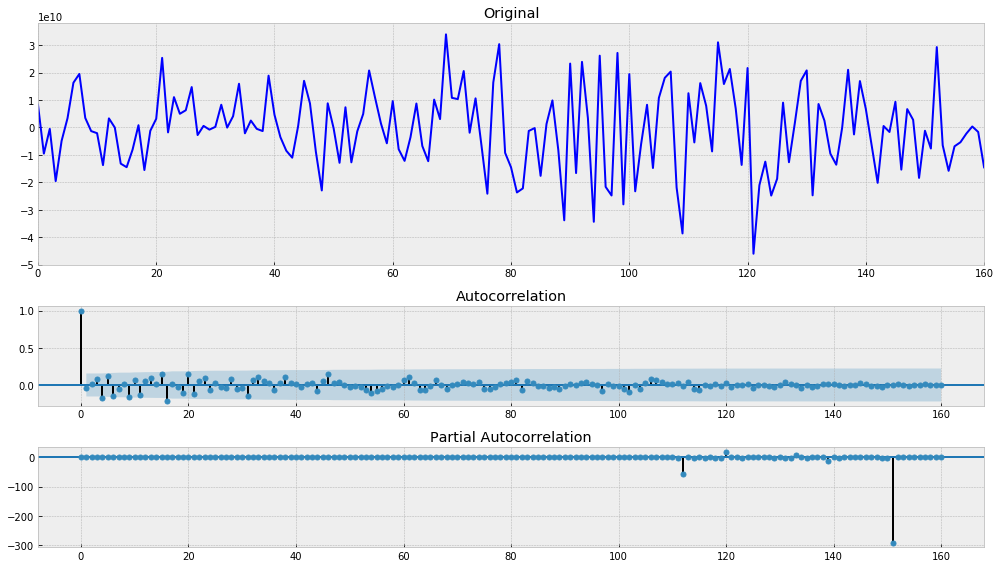

In [71]:
tsplot(dowjones_closing_ready_df)

Значение p_value и грфики удовлетворяют условия стационарного временного ряда!